## 安裝套件

In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 30kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=dfac060eafd7fcbcfc6925e044aacde3b712e5dd4b7d30a54648d5bc92c60261
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


## 下載測試圖片
點選左側工具列資料夾也可以手動上傳圖片

![](https://i.imgur.com/AqJVY2c.png)

In [17]:
!wget https://i.imgur.com/5pZrTnj.jpg -O test01.jpg

--2020-12-08 07:06:59--  https://i.imgur.com/5pZrTnj.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304838 (298K) [image/jpeg]
Saving to: ‘test01.jpg’

test01.jpg          100%[===================>] 297.69K  --.-KB/s    in 0.02s   

2020-12-08 07:06:59 (13.4 MB/s) - ‘test01.jpg’ saved [304838/304838]



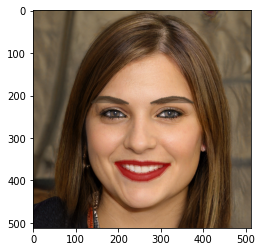

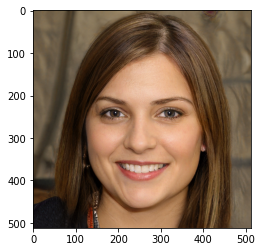

In [18]:
from PIL import Image, ImageDraw
import face_recognition
import matplotlib.pyplot as plt

# 載入照片
image = face_recognition.load_image_file("test01.jpg")

# 找出照片中人臉的輪廓(可找出照片中多個人物)
face_landmarks_list = face_recognition.face_landmarks(image)

# 將矩陣格式照片轉成一張PIL圖
pil_image = Image.fromarray(image)
for face_landmarks in face_landmarks_list:
    # 將照片放在畫板上
    d = ImageDraw.Draw(pil_image, 'RGBA')
    # polygon: 多邊形圖
    # line: 連成線條
    # 繪製眉毛
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # 繪製嘴唇
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # 亮眼效果
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # 繪製眼影
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)
    # 顯示上妝後結果
    plt.imshow(pil_image)
    plt.show()
    # 顯示原圖
    plt.imshow(image)
    plt.show()
